<a href="https://colab.research.google.com/github/Leon-web-net/Learning_ML/blob/main/Ensemble_Methods/GBM_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import fetch_covtype
data = fetch_covtype()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(data["DESCR"])

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

=================   ============
Classes                        7
Samples total             581012
Dimensionality                54
Features                     int
=================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional argument 'as_frame' is
se

In [6]:
df = pd.DataFrame(data["data"])
df.columns = data["feature_names"]
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df.shape

(581012, 54)

In [7]:
df_y = pd.Series(data["target"])
df_y.name = data["target_names"][0]
df_y.head(), df_y.unique()

(0    5
 1    5
 2    2
 3    2
 4    5
 Name: Cover_Type, dtype: int32,
 array([5, 2, 1, 7, 3, 6, 4], dtype=int32))

In [8]:
for col in df.columns:
  unique = df[col].unique()
  if len(unique) < 10:
    print(f"{col} : {unique}")
  else:
    print(f"{col} : {len(unique)} unique values")
  print(f"min: {min(unique)} max: {max(unique)}")

Elevation : 1978 unique values
min: 1859.0 max: 3858.0
Aspect : 361 unique values
min: 0.0 max: 360.0
Slope : 67 unique values
min: 0.0 max: 66.0
Horizontal_Distance_To_Hydrology : 551 unique values
min: 0.0 max: 1397.0
Vertical_Distance_To_Hydrology : 700 unique values
min: -173.0 max: 601.0
Horizontal_Distance_To_Roadways : 5785 unique values
min: 0.0 max: 7117.0
Hillshade_9am : 207 unique values
min: 0.0 max: 254.0
Hillshade_Noon : 185 unique values
min: 0.0 max: 254.0
Hillshade_3pm : 255 unique values
min: 0.0 max: 254.0
Horizontal_Distance_To_Fire_Points : 5827 unique values
min: 0.0 max: 7173.0
Wilderness_Area_0 : [1. 0.]
min: 0.0 max: 1.0
Wilderness_Area_1 : [0. 1.]
min: 0.0 max: 1.0
Wilderness_Area_2 : [0. 1.]
min: 0.0 max: 1.0
Wilderness_Area_3 : [0. 1.]
min: 0.0 max: 1.0
Soil_Type_0 : [0. 1.]
min: 0.0 max: 1.0
Soil_Type_1 : [0. 1.]
min: 0.0 max: 1.0
Soil_Type_2 : [0. 1.]
min: 0.0 max: 1.0
Soil_Type_3 : [0. 1.]
min: 0.0 max: 1.0
Soil_Type_4 : [0. 1.]
min: 0.0 max: 1.0
Soil_Typ

Prepare dataset

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, df_y, test_size=0.2, random_state=42, stratify=df_y)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
type(X_train)

numpy.ndarray

# 🌳 Gradient Boosting Machines (GBM) for Classification — Notes



<details>

## 1. Problem setup  
- Input features: $x_i \in \mathbb{R}^d$, $i=1,\dots,n$.  
- Labels: $y_i \in \{1,2,\dots,K\}$ (for $K$ classes).  
- Goal: learn a model that outputs class probabilities  

$$
p_k(x) = P(y = k \mid x).
$$

---

## 2. Raw scores $F_k(x)$  
- For each class $k$, the model keeps a **raw score** (a logit):  

$$
F_k(x) \in \mathbb{R}
$$

- Convert to probabilities using **softmax**:  

$$
p_k(x) = \frac{e^{F_k(x)}}{\sum_{j=1}^K e^{F_j(x)}}
$$  

- Special case $K=2$ (binary): often only one score $F(x)$ is kept, and probability is given by the sigmoid:  

$$
p(x) = \sigma(F(x)) = \frac{1}{1 + e^{-F(x)}}
$$

---

## 3. Initialization  
- Start with initial raw scores:  
  - Option 1: $F_k^{(0)}(x) = 0$ (uniform probs).  
  - Option 2: $F_k^{(0)}(x) = \log\left(\frac{\text{class frequency}_k}{n}\right)$ (log-priors).  
---

## 4. Loss function  
- Use **multiclass cross-entropy** (negative log-likelihood):  

$$
L = - \sum_{i=1}^n \sum_{k=1}^K \mathbf{1}(y_i = k)\,\log p_k(x_i)
$$

- For one point $i$:  

$$
L_i = -\log p_{y_i}(x_i)
$$
---

## 5. Gradient (residuals)  
- Differentiate loss wrt raw scores:  

$$
\frac{\partial L_i}{\partial F_k(x_i)} = p_k(x_i) - \mathbf{1}(y_i = k)
$$

- Negative gradient = **residual**:  

$$
r_{ik} = \mathbf{1}(y_i = k) - p_k(x_i)
$$  

Interpretation:  
- $r_{ik} > 0$: model underestimates class $k$.  
- $r_{ik} < 0$: model overestimates class $k$.  

---

## 6. Fit regression trees to residuals  
- At boosting round $m$, for each class $k$:  
  - Train a regression tree $h_k^{(m)}(x)$ using data $(x_i, r_{ik})$.  
  - Objective:  

$$
h_k^{(m)} = \arg\min_{h \in \mathcal{H}} \sum_{i=1}^n (r_{ik} - h(x_i))^2
$$  

where $\mathcal{H}$ = set of trees (with depth/leaf constraints).  

- In each leaf, prediction = **mean of residuals in that leaf**.  

So $h_k^{(m)}(x)$ is a piecewise-constant function that approximates residuals.  

---

## 7. Update raw scores  
- After fitting the trees, update raw scores:  

$$
F_k^{(m+1)}(x) = F_k^{(m)}(x) + \nu \cdot h_k^{(m)}(x)
$$  

where $\nu$ = learning rate.  

- After $M$ rounds:  

$$
F_k^{(M)}(x) = F_k^{(0)}(x) + \nu \sum_{m=1}^M h_k^{(m)}(x)
$$  

---

## 8. Iterate  
- Recompute probabilities:  

$$
p_k^{(m+1)}(x) = \frac{e^{F_k^{(m+1)}(x)}}{\sum_j e^{F_j^{(m+1)}(x)}}
$$  

- Recompute residuals using new probabilities.  
- Fit next trees $h_k^{(m+1)}(x)$.  
- Continue until $M$ boosting rounds.  

---

## 9. Final model and prediction  
- Final probabilities:  
  - Multiclass:  

$$
p_k(x) = \frac{e^{F_k^{(M)}(x)}}{\sum_j e^{F_j^{(M)}(x)}}
$$  

  - Binary:  

$$
p(x) = \sigma(F^{(M)}(x))
$$  

- Prediction = class with largest probability:  

$$
\hat{y} = \arg\max_k p_k(x)
$$  

---

## 10. Key intuitions  
- Residuals $r_{ik}$ = error signals (target - predicted prob).  
- Regression trees $h_k^{(m)}$ approximate residuals in feature space.  
- Updates are additive: each tree nudges predictions closer to truth.  
- Residuals shrink over rounds → corrections get smaller → convergence.  




In [10]:
import numpy as np

def softmax(logits):

  z = logits - logits.max(axis=1,keepdims=True) # numerical more stable
  ez = np.exp(z)
  return ez/ez.sum(axis=1,keepdims=True)

def one_hot(y,K=None):
  if K is None:
    K = int(np.max(y)) +1

  oh = np.zeros((y.shape[0],K))
  oh[np.arange(y.shape[0]),y] = 1.0   # oh[:,y] where y is class idx
  return oh

def cross_entropy(y,P):
  n = y.shape[0]
  return -np.log(P[np.arange(n),y]+1e-15).mean()


In [15]:
class RegressionStump:
  """
    Decision stump trained to minimise the squared error on a target.
    For multiclass boosting we fit one stump per class per round.
  """

  def __init_(self):
    self.feature = None
    self.threshold = None
    self.left_value = None
    self.right_value = None

  def fit(self,X,r):
    """
      X: (n,d) features
      r: (n,) residuals targets (scalar)
      Finds best split j, t to minimise sum of squared errors.
    """

    n, d = X.shape
    best_sse = np.inf
    best = (None,None,None,None) #  track best SSE and split params

    # d is feature
    for j in range(d):

      # for each j consider thresholds
      idx = np.argsort(X[:,j])
      xj = X[idx,j]
      r_sorted = r[idx]

      # calculate r and r^2 sums
      prefix_sum = np.cumsum(r_sorted)
      prefix_sum2 = np.cumsum(r_sorted**2)

      # scan candidate thresholds
      for i in range(1,n):
        # only consider split between two distinct feature values
        # avoid split that changes nothing
        if xj[i] == xj[i-1]:
          continue

        # leaf prediction means
        left_n = i
        right_n = n-i

        left_sum = prefix_sum[i-1]
        right_sum = prefix_sum[-1] - left_sum

        left_sum2 = prefix_sum2[i-1]
        right_sum2 = prefix_sum2[-1] - left_sum2

        left_mean = left_sum/left_n
        right_mean = right_sum/right_n

        left_sse = left_sum2 - left_n *(left_mean**2)
        right_sse = right_sum2 -right_n * (right_mean**2)
        sse = left_sse + right_sse

        if sse < best_sse:
          thr = (xj[i]+xj[i-1])/2.0
          best_sse = sse
          best = (j,thr,left_mean,right_mean)

    self.feature, self.threshold, self.left_value, self.right_value = best

    if self.feature is None:
      mean_r = r.mean()
      self.featrue, self.threshold = 0,np.inf
      self.left_value = mean_r
      self.right_value = mean_r

  def predict(self,X):
    mask = X[:,self.feature] <self.threshold
    out = np.where(mask,self.left_value,self.right_value)
    return out # shape (n,)






In [16]:
class GBMMUlticlass:
  """
    Multiclass Gradient Boosting with softmax + cross-entropy,
    using regression *stumps* as weak learners.

    At each round:
    - compute residuals r_{ik} = (y_i = k) - p_k(x_i)
    - For each class k, fit a stump h_k to r_{:k}
    - update F_k(x) += learning_rate*h_k(x)

    Parammeters
    -----------

    n_estimators : int
      Boosting rounds (epochs) M.
    learning_rate : float
      Shrinkage v.
"""

  def __init__(self,n_estimators=50, learning_rate=0.1, verbose=False):
    self.n_estimators = n_estimators
    self.learning_rate = learning_rate
    self.verbose = verbose

    self.K_ = None
    self.init_scores_ = None #(K,)
    self.stumps_ = []

  def _init_scores(self,y):
    # initialisation
    n = y.shape[0]
    K = self.K_

    # Initial raw scores F(x) = 1*n rows of init_scores
    counts = np.bincount(y,minlength=K).astype(float)
    priors = counts/max(1,n)

    priors = np.clip(priors,1e-12,1.0)
    return np.log(priors)

  def fit(self,X,y):
    """
      X: (n,d), y:(n,) with labels in {0,... K-1}
    """

    n,d = X.shape
    self.K_ = int(np.max(y))+1
    self.init_scores_ = self._init_scores(y)
    F = np.tile(self.init_scores_, (n,1))

    Y = one_hot(y,self.K_) # (n,K)

    self.stumps_ = []
    for m in range(self.n_estimators):
      # probabilities with current model???
      P = softmax(F)

      # residuals (negative gradient): [shape (n,K)]
      R = Y - P

      round_stumps = []
      for K in range(self.K_):
        stump = RegressionStump()
        stump.fit(X,R[:,K])
        round_stumps.append(stump)

      # update F with all class stumps
      for K, stump in enumerate(round_stumps):
        F[:,K] += self.learning_rate* stump.predict(X)

      self.stumps_.append(round_stumps)

      if self.verbose and (m%10 == 0 or m == self.n_estimators-1):
        loss = cross_entropy(y,softmax(F))
        print(f"iter {m+1:03d} loss: {loss:.4f}")

    return self

  def decision_function(self,X):
    """
      Returns raw scores F_k(X) (logits) before softmax. shape (n,K)
    """
    n = X.shape[0]
    F = np.tile(self.init_scores_,(n,1))
    for m,round_stumps in enumerate(self.stumps_):
      for K,stump in enumerate(round_stumps):
        F[:,K] += self.learning_rate * stump.predict(X)


    return F

  def predict_proba(self,X):
    return softmax(self.decision_function(X))

  def predict(self,X):
    P = self.predict_proba(X)
    return np.argmax(P,axis=1)

In [33]:
rng = np.random.default_rng(42)

# Make 3 Gaussian blobs in 2D
n_per = 1000
means = np.array([[0,0], [3,3], [0,4]])
cov = np.array([[0.8,0.2],[0.2,0.8]])
X_list, y_list = [], []
for k, mu in enumerate(means):
    Xk = rng.multivariate_normal(mu, cov, size=n_per)
    yk = np.full(n_per, k, dtype=int)
    X_list.append(Xk); y_list.append(yk)

X_0 = np.vstack(X_list)
y_0 = np.hstack(y_list)

idx = rng.permutation(X_0.shape[0])
X_0,y_0 = X_0[idx],y_0[idx]
n = X_0.shape[0]
n_tr = int(0.8*n)
X_tr, y_tr = X_0[:n_tr], y_0[:n_tr]
X_te, y_te = X_0[n_tr:], y_0[n_tr:]


In [34]:
gbm = GBMMUlticlass(n_estimators=100,learning_rate=0.1,verbose=True)
gbm.fit(X_tr,y_tr)


iter 001 loss: 1.0540
iter 011 loss: 0.7311
iter 021 loss: 0.5524
iter 031 loss: 0.4448
iter 041 loss: 0.3750
iter 051 loss: 0.3269
iter 061 loss: 0.2919
iter 071 loss: 0.2654
iter 081 loss: 0.2447
iter 091 loss: 0.2282
iter 100 loss: 0.2160


In [35]:
Pred_tr = gbm.predict_proba(X_tr)
Pred_test = gbm.predict_proba(X_te)
yhat_tr = np.argmax(Pred_tr,axis=1)
yhat_test = np.argmax(Pred_test,axis=1)

acc_tr = (yhat_tr == y_tr).mean()
acc_test = (yhat_test == y_te).mean()

print(f"Train accuracy: {acc_tr:.4f}")
print(f"Test accuracy: {acc_test:.4f}")

Train accuracy: 0.9642
Test accuracy: 0.9483


In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_sk_0 = GradientBoostingClassifier(
    loss = "log_loss",
    learning_rate=0.1,
    n_estimators=100,
    verbose=True,
    max_depth=1
)

gbm_sk_0.fit(X_tr,y_tr)

      Iter       Train Loss   Remaining Time 
         1           0.9690            0.54s
         2           0.8641            0.47s
         3           0.7770            0.44s
         4           0.7041            0.42s
         5           0.6408            0.41s
         6           0.5851            0.40s
         7           0.5370            0.39s
         8           0.4936            0.38s
         9           0.4575            0.37s
        10           0.4245            0.37s
        20           0.2322            0.32s
        30           0.1597            0.28s
        40           0.1264            0.24s
        50           0.1083            0.21s
        60           0.0977            0.16s
        70           0.0911            0.12s
        80           0.0866            0.08s
        90           0.0833            0.04s
       100           0.0810            0.00s


GradientBoostingClassifier(max_depth=1, verbose=True)

In [37]:
Pred_tr_sk = gbm_sk_0.predict_proba(X_tr)
Pred_test_sk = gbm_sk_0.predict_proba(X_te)
yhat_tr_sk = np.argmax(Pred_tr_sk,axis=1)
yhat_te_sk = np.argmax(Pred_test_sk,axis=1)

acc_tr = (yhat_tr_sk == y_tr).mean()
acc_test = (yhat_te_sk == y_te).mean()

print(f"Train accuracy: {acc_tr:.3f}")
print(f"Test  accuracy: {acc_test:.3f}")

Train accuracy: 0.973
Test  accuracy: 0.952


# Sklearn forest cover type

### Parameters

- `loss = "log_loss"` -> multinomial cross entropy.<Br>
maximise the log-likelihood under softmax.
<br>

- `learning_rate = 0.08` -> scales down contribution of each tree before adding it to ensemble (aka shrinkage).
<br>

- `n_estimators = 600` -> number of boosting rounds (M). <br>
Each round fit trees to residuals and updates logits<br>
More estimators = lower biasm but longer runtime and potential overfitting.
<br>

- `max_depth = 4` -> maximum depth of each regression tree.<br>
Controls tree complexity, deeper trees capture more interactions between features but can overfit and are slower.
<br>

- `min_sample_leaf = 50` -> Minimum number of samples required in a leaf node.<br>
Prevents leaves from being too small, which could lead to memorisation.<br>
Larger values = more regularisation, smoother model (between 20-200 for big datasets)
<br>

- `subsample = 0.8` -> Fraction of the training data is sampled (without replacement, no duplicates) for each boosting round.<br>
Adds randomness, reduces variances, combats overfitting.
<br>

- `max_features = "sqrt"` -> number of features considered when looking for best split. <br>
Adds randomness, reduces correlation between trees, improves generalisation.

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss

gbm_sk = GradientBoostingClassifier(
    loss ="log_loss",
    learning_rate=0.08,
    n_estimators=600,
    max_depth=4,
    min_samples_leaf=50,
    subsample=0.8,
    max_features="sqrt",
    random_state=42,
    verbose=True
)

gbm_sk.fit(X_train,y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.1337           0.0704           22.29m
         2           1.0807           0.0509           20.87m
         3           1.0395           0.0445           21.02m
         4           0.9981           0.0430           21.43m
         5           0.9673           0.0258           24.29m
         6           0.9339           0.0359           23.46m
         7           0.9020           0.0331           23.02m
         8           0.8788           0.0188           22.71m
         9           0.8644           0.0184           22.22m
        10           0.8477           0.0165           22.64m
        20           0.7417           0.0065           20.86m
        30           0.6779           0.0048           20.13m
        40           0.6384           0.0029           19.64m
        50           0.6107          -0.0008           19.11m
        60           0.5892          -0.0000           18.81m
       

GradientBoostingClassifier(learning_rate=0.08, max_depth=4, max_features='sqrt',
                           min_samples_leaf=50, n_estimators=600,
                           random_state=42, subsample=0.8, verbose=True)

In [40]:
proba_te = gbm_sk.predict_proba(X_test)
y_pred = gbm_sk.predict(X_test)

print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Log loss: ", log_loss(y_test,proba_te))

probas_staged = list(gbm_sk.staged_predict_proba(X_test))
loss_curve = [log_loss(y_test,P) for P in probas_staged]

Accuracy:  0.8343588375515262
Log loss:  0.40243631932995544


Macro F1: 0.8097677918320433
Weighted F1: 0.8333427243893462
              precision    recall  f1-score   support

           1       0.83      0.80      0.81     42368
           2       0.83      0.87      0.85     56661
           3       0.86      0.89      0.88      7151
           4       0.86      0.83      0.85       549
           5       0.87      0.52      0.65      1899
           6       0.79      0.71      0.75      3473
           7       0.93      0.85      0.89      4102

    accuracy                           0.83    116203
   macro avg       0.85      0.78      0.81    116203
weighted avg       0.83      0.83      0.83    116203



<Axes: >

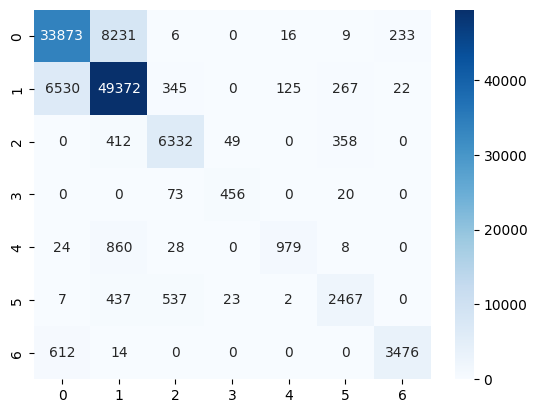

In [44]:
from sklearn.metrics import f1_score,classification_report, confusion_matrix
import seaborn as sns

print("Macro F1:", f1_score(y_test, y_pred, average="macro"))
print("Weighted F1:", f1_score(y_test, y_pred, average="weighted"))
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [45]:
from sklearn.metrics import top_k_accuracy_score
# chekcs if the correct class was in the top k most likely classes
print("Top-3 Accuracy:", top_k_accuracy_score(y_test, proba_te, k=3))

Top-3 Accuracy: 0.9987435780487595


Text(0, 0.5, 'Log loss')

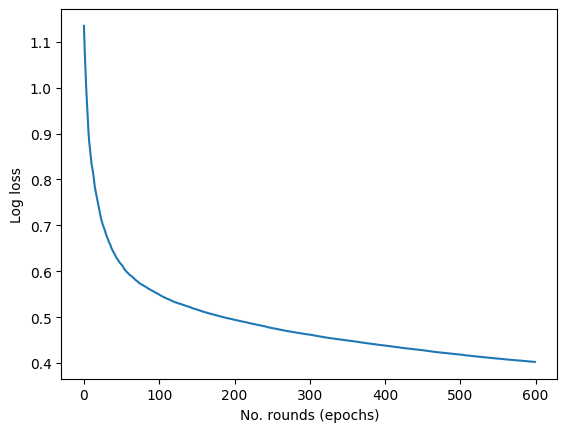

In [46]:
import matplotlib.pyplot as plt

plt.plot(loss_curve)
plt.xlabel("No. rounds (epochs)")
plt.ylabel("Log loss")


# 📉 Why 83% Accuracy is Low on Forest CoverType

The **Forest CoverType** dataset has ~581,000 samples, 54 features, and 7 classes.  
With this much data, well-tuned ensemble methods usually achieve **90–96% accuracy**.  
So an accuracy of **83%** with classic Gradient Boosting indicates **underfitting** or suboptimal hyperparameters.

---

## 🔎 Why accuracy is low
- **Shallow trees (`max_depth=4`)**: limits the model to only 4-way feature interactions, which may not capture complex terrain/soil relationships.
- **Large `min_samples_leaf=50`**: overly restricts leaf size, making the trees too smooth.
- **`max_features="sqrt"`**: only a small random subset of features considered at each split, which can weaken splits in GBM (this setting is better for Random Forests).
- **Number of estimators (`n_estimators=600`)**: may be insufficient given the chosen learning rate (`0.08`), so the model stops improving early.
- **No stratification during train-test split**: can lead to class imbalance in the test set.

---

## ⚡ How to improve performance
- Increase tree depth: try `max_depth=6` (or higher with regularization).
- Lower `min_samples_leaf` (e.g., 20–30) to allow finer partitions.
- Use more estimators with smaller learning rate:
  $$
  \text{learning rate} = 0.05, \quad n\_estimators = 1000
  $$
- Set `max_features=None` or a high fraction (e.g., `0.8`) so GBM uses more features per split.
- Ensure stratified splits: `train_test_split(..., stratify=y)`.

---

## 🚀 Other ensemble methods with better performance
- **XGBoost**  
  - Uses gradient + Hessian (second-order) information.  
  - Has L1/L2 regularization on leaves.  
  - Highly optimized (multi-core CPU, GPU).  
  - Typical accuracy: **92–95%** on CoverType.  

- **LightGBM**  
  - Leaf-wise tree growth (more powerful than level-wise).  
  - Histogram-based training (faster on large datasets).  
  - Good for very large datasets with many features.  
  - Typical accuracy: **93–96%**.  

- **CatBoost**  
  - Handles categorical features natively (not needed here, but useful elsewhere).  
  - Ordered boosting reduces overfitting.  
  - Accuracy competitive with LightGBM and XGBoost.  

---

## ✅ Summary
- 83% accuracy with classic GBM is **low for CoverType**.  
- Improve by tuning **depth, leaf size, learning rate, estimators, and max features**.  
- For state-of-the-art performance, use **XGBoost, LightGBM, or CatBoost**, which consistently reach **90–96% accuracy** on this dataset.
